Hi Ryan. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Scientist. But if you can't handle this task yet , I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review

It's a great project. However, I have some comments about target distribution and the most profitable region.

# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd

df = pd.read_csv('/datasets/vehicles_us.csv')

print(df.head(20))

df.info()

    price  model_year                     model  condition  cylinders fuel  \
0    9400      2011.0                    bmw x5       good        6.0  gas   
1   25500         NaN                ford f-150       good        6.0  gas   
2    5500      2013.0            hyundai sonata   like new        4.0  gas   
3    1500      2003.0                ford f-150       fair        8.0  gas   
4   14900      2017.0              chrysler 200  excellent        4.0  gas   
5   14990      2014.0              chrysler 300  excellent        6.0  gas   
6   12990      2015.0              toyota camry  excellent        4.0  gas   
7   15990      2013.0               honda pilot  excellent        6.0  gas   
8   11500      2012.0               kia sorento  excellent        4.0  gas   
9    9200      2008.0               honda pilot  excellent        NaN  gas   
10  19500      2011.0  chevrolet silverado 1500  excellent        8.0  gas   
11   8990      2012.0              honda accord  excellent      

### Step 2. Data preprocessing

In [2]:
df['is_4wd'] = df['is_4wd'].fillna(0).astype('int')

# It appears that the NaN values represent the false values of a Boolean fied.

df['model_year'] = df['model_year'].fillna(df['model_year'].mean()).astype('int')

df['odometer'] = df['odometer'].fillna(df['odometer'].mean()).astype('int')

print(df.head(20))

# We decided to fill in the missing values with the mean value of the column. This will give us more data to work with.



    price  model_year                     model  condition  cylinders fuel  \
0    9400        2011                    bmw x5       good        6.0  gas   
1   25500        2009                ford f-150       good        6.0  gas   
2    5500        2013            hyundai sonata   like new        4.0  gas   
3    1500        2003                ford f-150       fair        8.0  gas   
4   14900        2017              chrysler 200  excellent        4.0  gas   
5   14990        2014              chrysler 300  excellent        6.0  gas   
6   12990        2015              toyota camry  excellent        4.0  gas   
7   15990        2013               honda pilot  excellent        6.0  gas   
8   11500        2012               kia sorento  excellent        4.0  gas   
9    9200        2008               honda pilot  excellent        NaN  gas   
10  19500        2011  chevrolet silverado 1500  excellent        8.0  gas   
11   8990        2012              honda accord  excellent      

### Step 3. Make calculations and add them to the table

In [3]:
df['condition'].where(df['condition'] != 'new', 5, inplace=True)
df['condition'].where(df['condition'] != 'like new', 4, inplace=True)
df['condition'].where(df['condition'] != 'excellent', 3, inplace=True)
df['condition'].where(df['condition'] != 'good', 2, inplace=True)
df['condition'].where(df['condition'] != 'fair', 1, inplace=True)
df['condition'].where(df['condition'] != 'salvage', 0, inplace=True)

# We used where to replace string conditions with numeric values, it was important to use
# inplace as to change the original data frame.

df['day_of_week'] = pd.DatetimeIndex(df['date_posted']).dayofweek
df['day_of_week'].where(df['day_of_week'] != 0, 'sunday', inplace=True)
df['day_of_week'].where(df['day_of_week'] != 1, 'monday', inplace=True)
df['day_of_week'].where(df['day_of_week'] != 2, 'tuesday', inplace=True)
df['day_of_week'].where(df['day_of_week'] != 3, 'wednesday', inplace=True)
df['day_of_week'].where(df['day_of_week'] != 4, 'thursday', inplace=True)
df['day_of_week'].where(df['day_of_week'] != 5, 'friday', inplace=True)
df['day_of_week'].where(df['day_of_week'] != 6, 'saturday', inplace=True)

# We created a new column in the dataframe for the day of the week. We then converted each
# numerical value into a string using .where() method.

df['month'] = pd.DatetimeIndex(df['date_posted']).month

# We created a new column in the dataframe for the numerical month.

df['year'] = (pd.DatetimeIndex(df['date_posted']).year + df['month']/12).round(decimals=2)

# We created a new column for the year. We incorporated the months in decimal form to ensure
# more accurate results.

df['age'] = df['year'] - df['model_year']

# The above represents the age of the vehicle's age when the ad was placed.

df['average_yearly_miles'] = (df['odometer']/df['age']).astype('int')

print(df.head(30))

    price  model_year                     model condition  cylinders fuel  \
0    9400        2011                    bmw x5         2        6.0  gas   
1   25500        2009                ford f-150         2        6.0  gas   
2    5500        2013            hyundai sonata         4        4.0  gas   
3    1500        2003                ford f-150         1        8.0  gas   
4   14900        2017              chrysler 200         3        4.0  gas   
5   14990        2014              chrysler 300         3        6.0  gas   
6   12990        2015              toyota camry         3        4.0  gas   
7   15990        2013               honda pilot         3        6.0  gas   
8   11500        2012               kia sorento         3        4.0  gas   
9    9200        2008               honda pilot         3        NaN  gas   
10  19500        2011  chevrolet silverado 1500         3        8.0  gas   
11   8990        2012              honda accord         3        4.0  gas   

### Step 4. Carry out exploratory data analysis

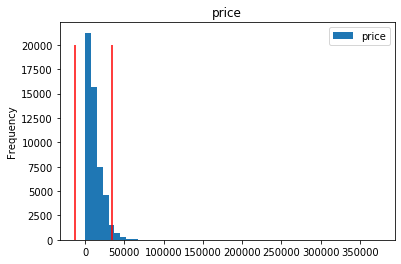

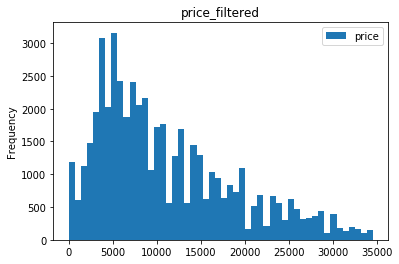

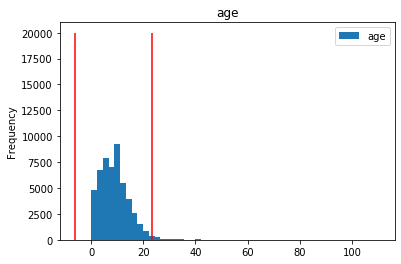

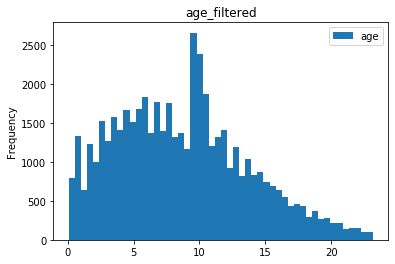

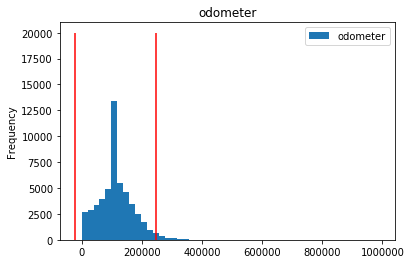

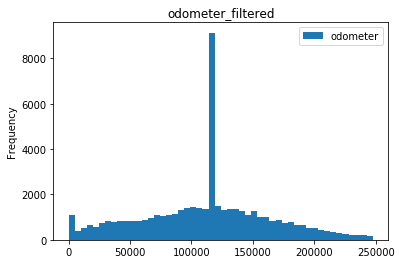

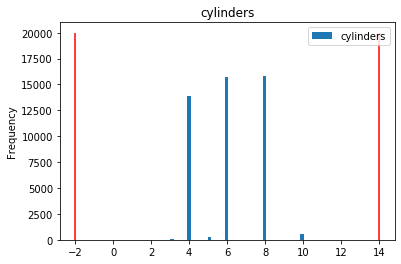

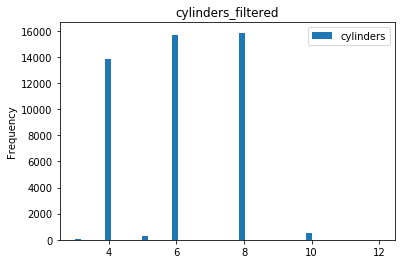

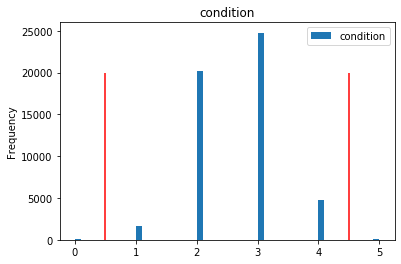

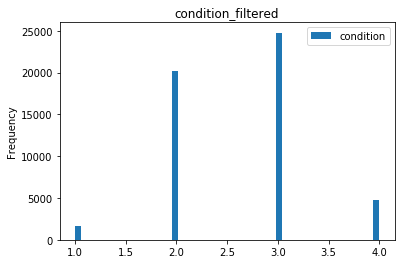

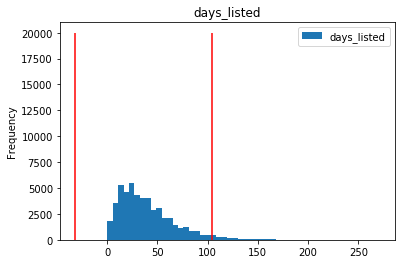

The upper limits & low limits are: -32.0 104.0
mean days listed: 39
median days listed: 33


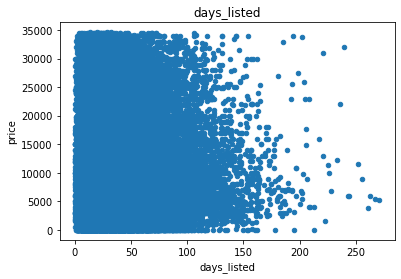

             number_of_ads  average_price
type                                     
bus                     24          17135
offroad                214          14292
other                  256          10989
convertible            446          14575
van                    633          10546
hatchback             1047           6868
mini-van              1161           8193
wagon                 1541           9088
coupe                 2303          14353
pickup                6988          16057
sedan                12154           6965
truck                12353          16734
SUV                  12405          11149
Top 2 types with greatest # of ads: truck & SUV


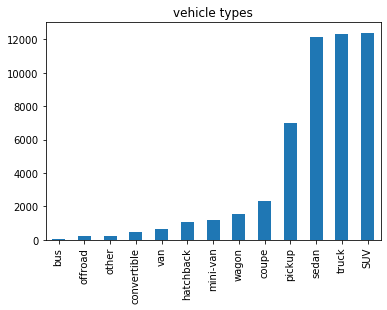

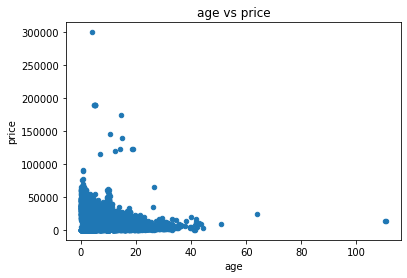

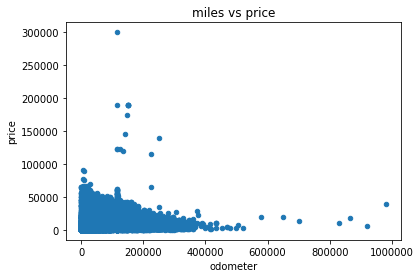

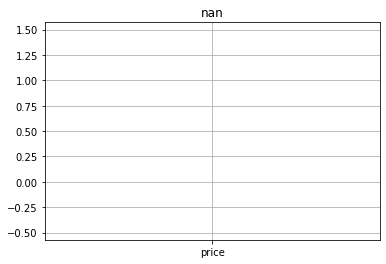

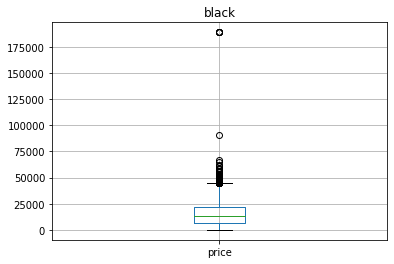

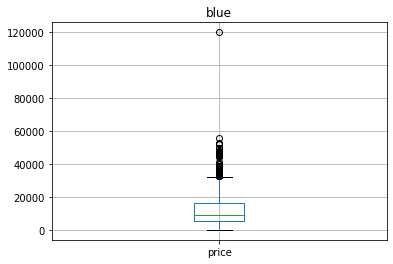

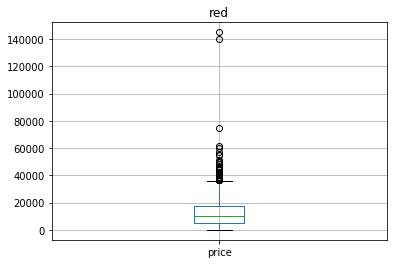

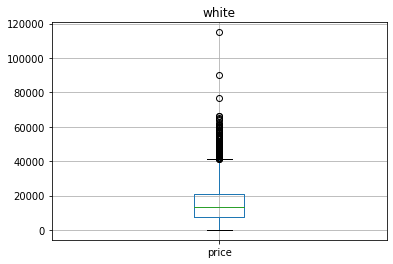

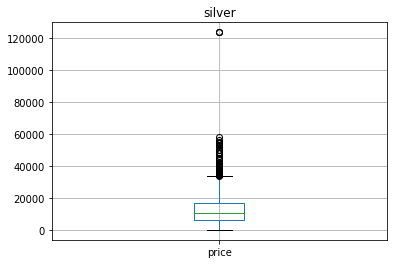

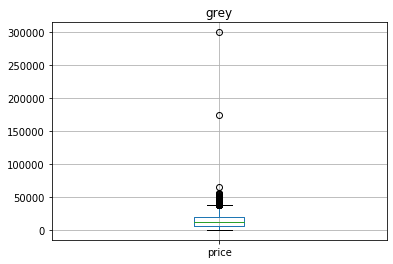

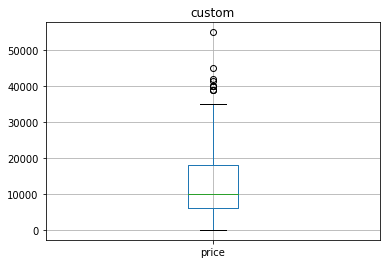

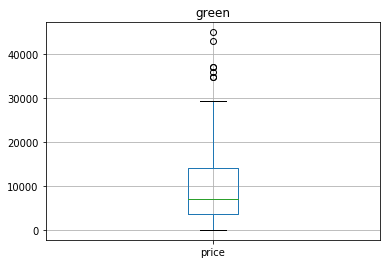

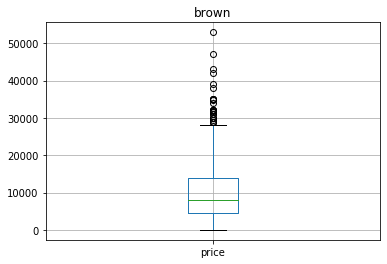

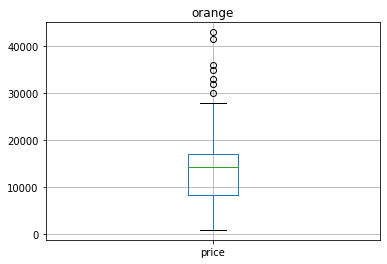

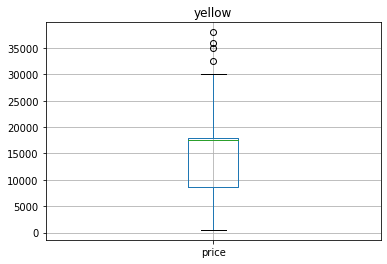

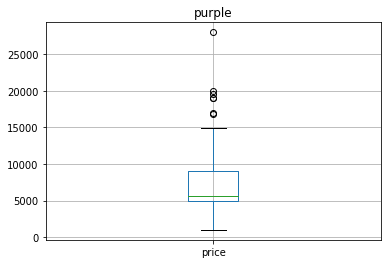

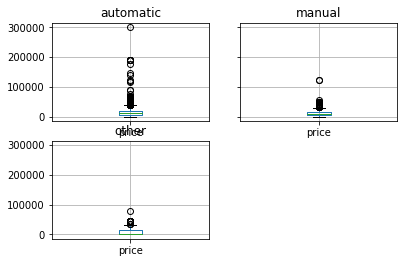

paint_color
purple     7599
green      9589
brown     10433
custom    11955
blue      11961
red       12640
silver    12682
orange    14011
grey      14125
yellow    15286
white     15517
black     15722
Name: price, dtype: int64
transmission
other         8070
manual       11151
automatic    14141
Name: price, dtype: int64


In [4]:
import matplotlib.pyplot as plt

df.plot(y='price', kind='hist', bins=50, title='price')
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
LF = Q1 - IQR*1.5
RF = Q3 + IQR*1.5
plt.vlines(x=[LF,RF], ymin=0, ymax=20000, color='red')
plt.show()

filtered_data_price = df.query('@LF < price < @RF')
filtered_data_price.plot(y='price', kind='hist', bins=50, title='price_filtered')
plt.show()

df.plot(y='age', kind='hist', bins=50, title='age')
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
LF = Q1 - IQR*1.5
RF = Q3 + IQR*1.5
plt.vlines(x=[LF,RF], ymin=0, ymax=20000, color='red')
plt.show()

filtered_data = df.query('@LF < age < @RF')
filtered_data.plot(y='age', kind='hist', bins=50, title='age_filtered')
plt.show()

df.plot(y='odometer', kind='hist', bins=50, title='odometer')
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3-Q1
LF = Q1 - IQR*1.5
RF = Q3 + IQR*1.5
plt.vlines(x=[LF,RF], ymin=0, ymax=20000, color='red')
plt.show()

filtered_data = df.query('@LF < odometer < @RF')
filtered_data.plot(y='odometer', kind='hist', bins=50, title='odometer_filtered')
plt.show()

df.plot(y='cylinders', kind='hist', bins=50, title='cylinders')
Q1 = df['cylinders'].quantile(0.25)
Q3 = df['cylinders'].quantile(0.75)
IQR = Q3-Q1
LF = Q1 - IQR*1.5
RF = Q3 + IQR*1.5
plt.vlines(x=[LF,RF], ymin=0, ymax=20000, color='red')
plt.show()

filtered_data = df.query('@LF < cylinders < @RF')
filtered_data.plot(y='cylinders', kind='hist', bins=50, title='cylinders_filtered')
plt.show()

df.plot(y='condition', kind='hist', bins=50, title='condition')
Q1 = df['condition'].quantile(0.25)
Q3 = df['condition'].quantile(0.75)
IQR = Q3-Q1
LF = Q1 - IQR*1.5
RF = Q3 + IQR*1.5
plt.vlines(x=[LF,RF], ymin=0, ymax=20000, color='red')
plt.show()

filtered_data = df.query('@LF < condition < @RF')
filtered_data.plot(y='condition', kind='hist', bins=50, title='condition_filtered')
plt.show()

# First we plotted a histogram using the raw data for each of the parameters under review.
# We than calculated the upper and lower limits & used the limits to filter the data.
# The limits allowed us to remove the outliers.

#**********************
df.plot(y='days_listed', kind='hist', bins=50, title='days_listed')
Q1 = df['days_listed'].quantile(0.25)
Q3 = df['days_listed'].quantile(0.75)
IQR = Q3-Q1
LF = Q1 - IQR*1.5
RF = Q3 + IQR*1.5
plt.vlines(x=[LF,RF], ymin=0, ymax=20000, color='red')
plt.show()
print('The upper limits & low limits are:',LF,RF)

print('mean days listed:', df['days_listed'].mean().astype('int'))
print('median days listed:', df['days_listed'].median().astype('int'))

filtered_data_price.plot(x='days_listed', y='price', kind='scatter', title='days_listed')
plt.show()

data_pivot = df.pivot_table(index='type', values='price', aggfunc=['count', 'mean']).astype('int')
data_pivot.columns=['number_of_ads', 'average_price']
data_pivot.sort_values('number_of_ads', ascending=True, inplace=True)

print(data_pivot.head(30))

print('Top 2 types with greatest # of ads: truck & SUV')

df['type'].value_counts(ascending=True).plot(kind='bar', title='vehicle types') 
plt.show()

top_two_types = ['truck', 'SUV']
filter_data_type = df.query('type in @top_two_types')
# We want to create a new dataframe using the top two types. Therefore, we filtered the data by those types.

filter_data_type.plot(x='age', y='price', kind='scatter', title='age vs price')
plt.show()
filter_data_type.plot(x='odometer', y='price', kind='scatter', title='miles vs price')
plt.show()

#filter_data_type.plot(x='condition', y='price', kind='scatter') NOT SURE WHY THIS IS GIVING ME AN ERROR
# THE X AXIS CONSISTS OF INTEGERS CONTRARY TO THE ERROR MESSAGE
#plt.show()

for element in filter_data_type['paint_color'].unique():
    filter_data_type.query('paint_color == @element').boxplot(column='price').set_title(element)
    plt.show()
    
# We plotted these by using a for loop for every element in the unique

filter_data_type.groupby('transmission').boxplot(column='price')
plt.show()

# above is a second way to plot boxplots using the bygroup() method

print(filter_data_type.groupby('paint_color')['price'].mean().sort_values(ascending=True).astype('int'))
print(filter_data_type.groupby('transmission')['price'].mean().sort_values(ascending=True).astype('int'))

# We printed the mean for each group so we can better compare the prices. We sorted them in ascending order
# so we can easily distinguis the highest price by group.

### Step 5. Overall conclusion

- The most common price of cars is roughly $5,000
- The most common age of cars is 10 years 
- The most common mileage is between 100,000 to 150,000
- The most common cylinders are 6 & 8
- The most frequent condition is excellent
- The average days listed are 39 days
- The median days listed are 33 days
- Very long ads would be ones that are greater than 150 days
- The tope 2 vehicle types are: trucks and SUVs
- Age appears to have an inverse relation to price
- The less miles on a car the more expensive it tends to be
- The paint color with the highest average price is black
- The transmission type with the highest average price is automatic

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn